# INF285 - Computación Científica
# Laboratorio 1 - Contexto
## 26 de marzo de 2025

Ingenieros astroinformáticos de la Universidad Técnica Federico Santa María (USM) forman parte de un equipo especializado encargado del diseño, implementación y optimización de los sistemas computacionales a bordo de una nave espacial de última generación. Su trabajo se centra en garantizar la precisión y eficiencia de los cálculos realizados bajo el estándar de punto flotante IEEE 754, un pilar fundamental para las operaciones numéricas en entornos críticos como el espacio. Entre sus responsabilidades principales está el desarrollo del sistema de apuntado de las armas gaussianas integradas en la nave, un componente clave para la defensa y el combate en misiones interestelares.

El sistema de apuntado depende de dos aspectos cruciales en los que estos ingenieros han enfocado sus esfuerzos. Primero, la correcta implementación del estándar IEEE 754 asegura que los cálculos de trayectorias y ajustes en tiempo real se realicen sin errores significativos de redondeo, algo vital cuando se opera con números extremadamente grandes o pequeños, como las distancias astronómicas o las velocidades relativistas. Segundo, el uso de métodos de diferencias finitas para aproximar la velocidad de las naves objetivo, basándose en datos provenientes de sensores de alta precisión. Este cálculo, que actúa como una derivada numérica, estima la tasa de cambio en la posición de los objetivos y es esencial para predecir su movimiento. Sin embargo, el equipo también tuvo que abordar el problema de la pérdida de importancia (o cancelación catastrófica), un fenómeno que ocurre al restar valores muy cercanos en punto flotante, lo que puede introducir errores en las predicciones y afectar la precisión del apuntado.

Por último, las armas gaussianas, que disparan pulsos electromagnéticos concentrados siguiendo una distribución gaussiana, requieren una calibración extremadamente precisa. Los ingenieros han optimizado los algoritmos para ajustar la dispersión y el enfoque del arma, integrando los datos de velocidad aproximada con las correcciones en tiempo real del sistema de sensores. Este proceso no solo asegura que los disparos alcancen su objetivo con exactitud milimétrica, sino que también minimiza el consumo energético en un entorno donde cada recurso es crítico.

En resumen, este equipo de astroinformáticos no solo ha enfrentado desafíos teóricos relacionados con el estándar IEEE 754 y las diferencias finitas, sino que ha aplicado estos conceptos a un problema práctico de ingenología espacial: el desarrollo de un sistema de armamento avanzado que combina precisión computacional y física avanzada para proteger la nave en el vasto y hostil entorno del espacio.

<p align="center">
  <img src="nave.png" alt="drawing" style="margin:auto;width:400px;"/>
</p>

## Ejemplo 1

Los ingenieros astroinformáticos de la USM están utilizando una función $f(k)$ para calibrar la intensidad de un pulso gaussiano en el arma de la nave, pero esta función está causando errores al usar *doble precisión*, ya que a medida que aumenta la precisión, llega un punto en el que la función retorna $0$.

$$ f(k) = \sqrt{1 + 4k} - 1 $$

Dado esto, inicialmente los ingenieros desean obtener para qué valor de $k$, la función $f(k)$ retorna 0.

In [2]:
#Borrar esta celda despues de ejecutarla
!pip install numpy
!pip install ipywidgets


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

In [4]:
f = lambda k: np.sqrt(1 + 4*k) - 1

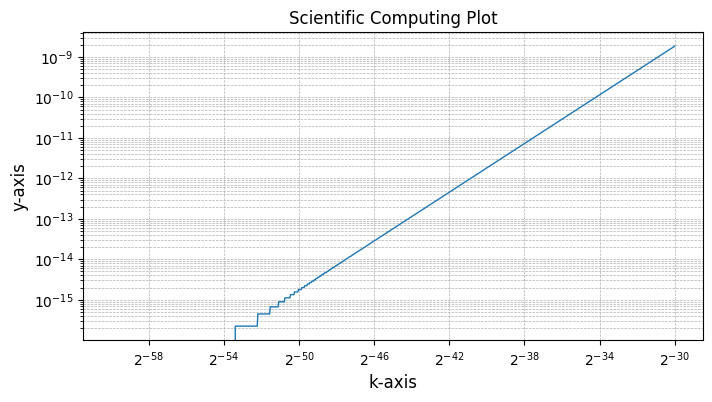

In [5]:
k = np.logspace(-60, -30, num=1000, base=2)

plt.figure(figsize=(8, 4))
plt.loglog(k, f(k), lw=1)
plt.xscale('log', base=2)

plt.xlabel("k-axis", fontsize=12)
plt.ylabel("y-axis", fontsize=12)
plt.title("Scientific Computing Plot")

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

Al analizar el gráfico y la función con mayor detalle, se dan cuenta de que, para que la función de $0$ en *doble precisión*, el término $\sqrt{1 + 4k} = 1$.

Sabemos que $\epsilon_{mach}$ es el valor más pequeño que, cuando se suma a $1$, produce un número mayor que $1$. Entonces, para que no se le pueda sumar un valor a $1$, este debe ser menor que $\epsilon_{mach}$, el cual en *doble precisión* es $2^{-52}$. Por lo tanto, el valor de $k$ que necesitamos sería $2^{-53}$. Evaluemos $f(k=2^{-53})$:

In [6]:
f(2**-53)

np.float64(2.220446049250313e-16)

Como podemos observar, $f(k=2^{-53}) \neq 0$. Esto se debe a que, en la función, $k$ está siendo multiplicado por $4$, que es una potencia de $2$. Por lo tanto nuestro valor de $k$ debe ser aún menor.

$$ 4 \cdot k = 2^{-53} $$
$$ k = \frac{2^{-53}}{4} $$
$$ k = \frac{2^{-53}}{2^{2}} $$
$$ k = 2^{-55} $$

Comprobemos evaluando $f(k=2^{-55})$:

In [7]:
f(2**-55)

np.float64(0.0)

Efectivamente, para un $k = 2^{-55}$ la función $f(k)$ da $0$.

Ahora requerimos solucionar este problema, ya que no queremos ser incapaces de calibrar la intensidad de un pulso gaussiano en el arma de la nave. Nos damos cuenta de que el gran problema de la función es la resta, que es la causante del error de cancelación. Para eliminar esta resta, uno podría pensar en racionalizar la función:

$$ f(k) = \sqrt{1 + 4k} - 1 \cdot \frac{\sqrt{1 + 4k} + 1}{\sqrt{1 + 4k} + 1} $$
$$ f(k) = \frac{1 + 4k - 1}{\sqrt{1 + 4k} + 1} $$
$$ f(k) = \frac{4k}{\sqrt{1 + 4k} + 1} $$

Evaluemos la nueva función:

In [8]:
f_fix = lambda k: 4*k/(np.sqrt(1 + 4*k) + 1)
f_fix(2**-55)

np.float64(5.551115123125783e-17)

Por lo tanto, hemos solucionado el problema de pérdida de importancia y error de cancelación.

## Ejemplo 2

Los ingenieros astroinformáticos de la USM están calibrando el sistema de apuntado de las armas gaussianas y necesitan analizar cómo se representan diferentes distancias en distintas versiones de *estándar de punto flotante*. Para garantizar la robustez del sistema, deben estudiar las diferentes cantidades de bits que puede tener el *exponente* en *IEEE 754*, además de visualizar todos los casos especiales. Este análisis les permitirá optimizar el sistema para manejar con precisión tanto distancias grandes como pequeñas, evitando fallos en el apuntado del arma gaussiana durante misiones críticas.

In [9]:
def plot_exponent_mapping(exp_bits):

    max_val = np.power(2, exp_bits) - 1
    bias = np.power(2, exp_bits - 1) - 1

    almacenados = np.arange(1, max_val)
    utilizados = almacenados - bias

    print("EXPLICACIÓN: \n")
    print(f"PASO 1: El exponente tiene {exp_bits} bits, por lo que puede representar 2^{exp_bits} = {np.power(2,exp_bits)} valores distintos.")
    print(f"PASO 2: Esos {np.power(2,exp_bits)} valores van desde 1 hasta {np.power(2,exp_bits)} y queremos tener el número 0" )
    print(f"PASO 3: Correr los numeros para agregar el 0: [0,1,...,{np.power(2,exp_bits)-1}]" )
    print(f"Paso 4: Además tenemos 2 casos especiales cuando el exponente son puros 0's y puros 1's " )
    print(f"Paso 5: Los casos espciales nos quitan un número por arriba y uno por abajo" )
    print(f"Paso 6: Nuevos números disponibles = [1,2,..{np.power(2,exp_bits)-2}]" )
    print(f"Paso 7: Calculamos el BIAS = 2^(bits_mantisa-1) -1 =  {bias}" )
    print(f"Paso 8: Aplicamos el bias [1,2,..{np.power(2,exp_bits)-2}] => [{1-bias},{2-bias},...,{np.power(2,exp_bits)-2-bias}]" )
    print("\n\n Visualize la representación de 3 bits. Tanto el punto rojo subnormal como el primer punto azul normal tienen \n"
    "el mismo valor utilizado, pero distinto valor almacenado, ¿a qué se debe esto?")

    fig, ax = plt.subplots(figsize=(8, 6))

    # Normales
    ax.scatter(almacenados, utilizados, color='blue', label="Normales")

    # Casos especiales
    ax.scatter(0, 1- bias, color='red', label="Subnormal (almacenado = [0...0])", zorder=5)
    ax.scatter(max_val, max_val - bias, color='red', label="Inf/NaN (almacenado = [1...1])", zorder=5)

    # Ejes
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

    ax.set_xlabel("Almacenado", fontsize=12)
    ax.set_ylabel("Utilizado = Almacenado - Bias", fontsize=12)
    ax.set_title(f"ExpBits = {exp_bits} | Bias = {bias}", fontsize=14)
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.legend()
    plt.tight_layout()
    plt.show()

# Widget interactivo
interact(plot_exponent_mapping, exp_bits=widgets.IntSlider(min=3, max=11, step=1, value=8))

interactive(children=(IntSlider(value=8, description='exp_bits', max=11, min=3), Output()), _dom_classes=('wid…

<function __main__.plot_exponent_mapping(exp_bits)>